In [1]:
import os ,sys 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

In [2]:
#result_complex = pd.read_csv("Clean_dataframe_balanced_all_data_ccharppi_08_july_2019.csv")
# validation_dataframe = pd.read_csv("Clean_dataframe_unbalanced_all_data_ccharppi_08_july_2019.csv")

result_complex = pd.read_csv("Clean_dataframe_balanced_all_data_ccharppi_04_september_2019.csv")
validation_dataframe = pd.read_csv("Clean_dataframe_unbalanced_all_data_ccharppi_04_september_2019.csv")

result_complex = result_complex.set_index("Unnamed: 0")

validation_dataframe = validation_dataframe.set_index("Unnamed: 0")

np.random.seed(seed = 101)

In [3]:
selected_features = ["CONSRANK_val",
"CP_MJ3h",
"PYDOCK_TOT",
"DDG_V",
"CP_HLPL",
"SIPPER",
"ELE",
"CP_SKOIP",
"CP_D1",
"AP_GOAP_DF",
"CP_RMFCA",
"AP_PISA",
"CP_TD",
"CP_TSC",
"CP_TB",
"AP_DFIRE2",
"AP_dDFIRE",
"CP_Qp",
"AP_DARS",
"CP_BT"]

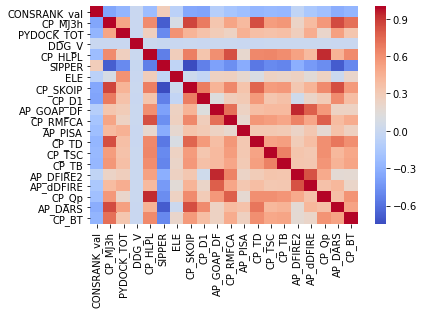

In [4]:
sns.heatmap( validation_dataframe[selected_features].corr(),cmap='coolwarm')

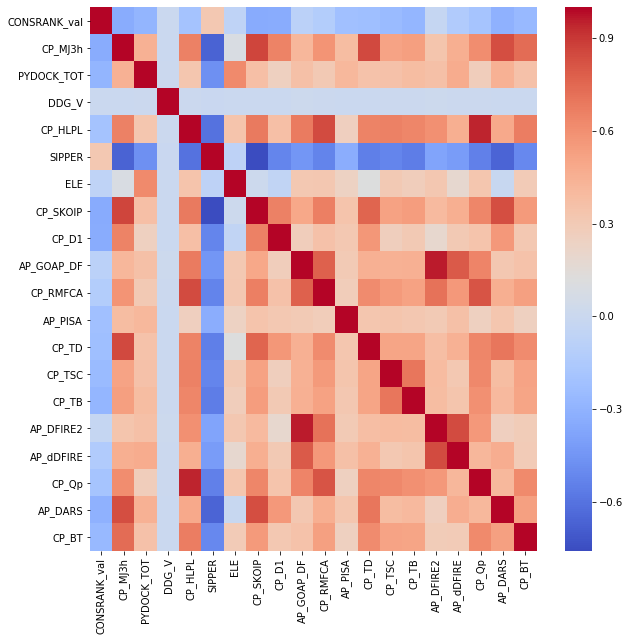

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap( result_complex[selected_features].corr(),cmap='coolwarm')
plt.savefig("Correlation_of_Features_selected_ccharppi_heatmap.png",format="png")

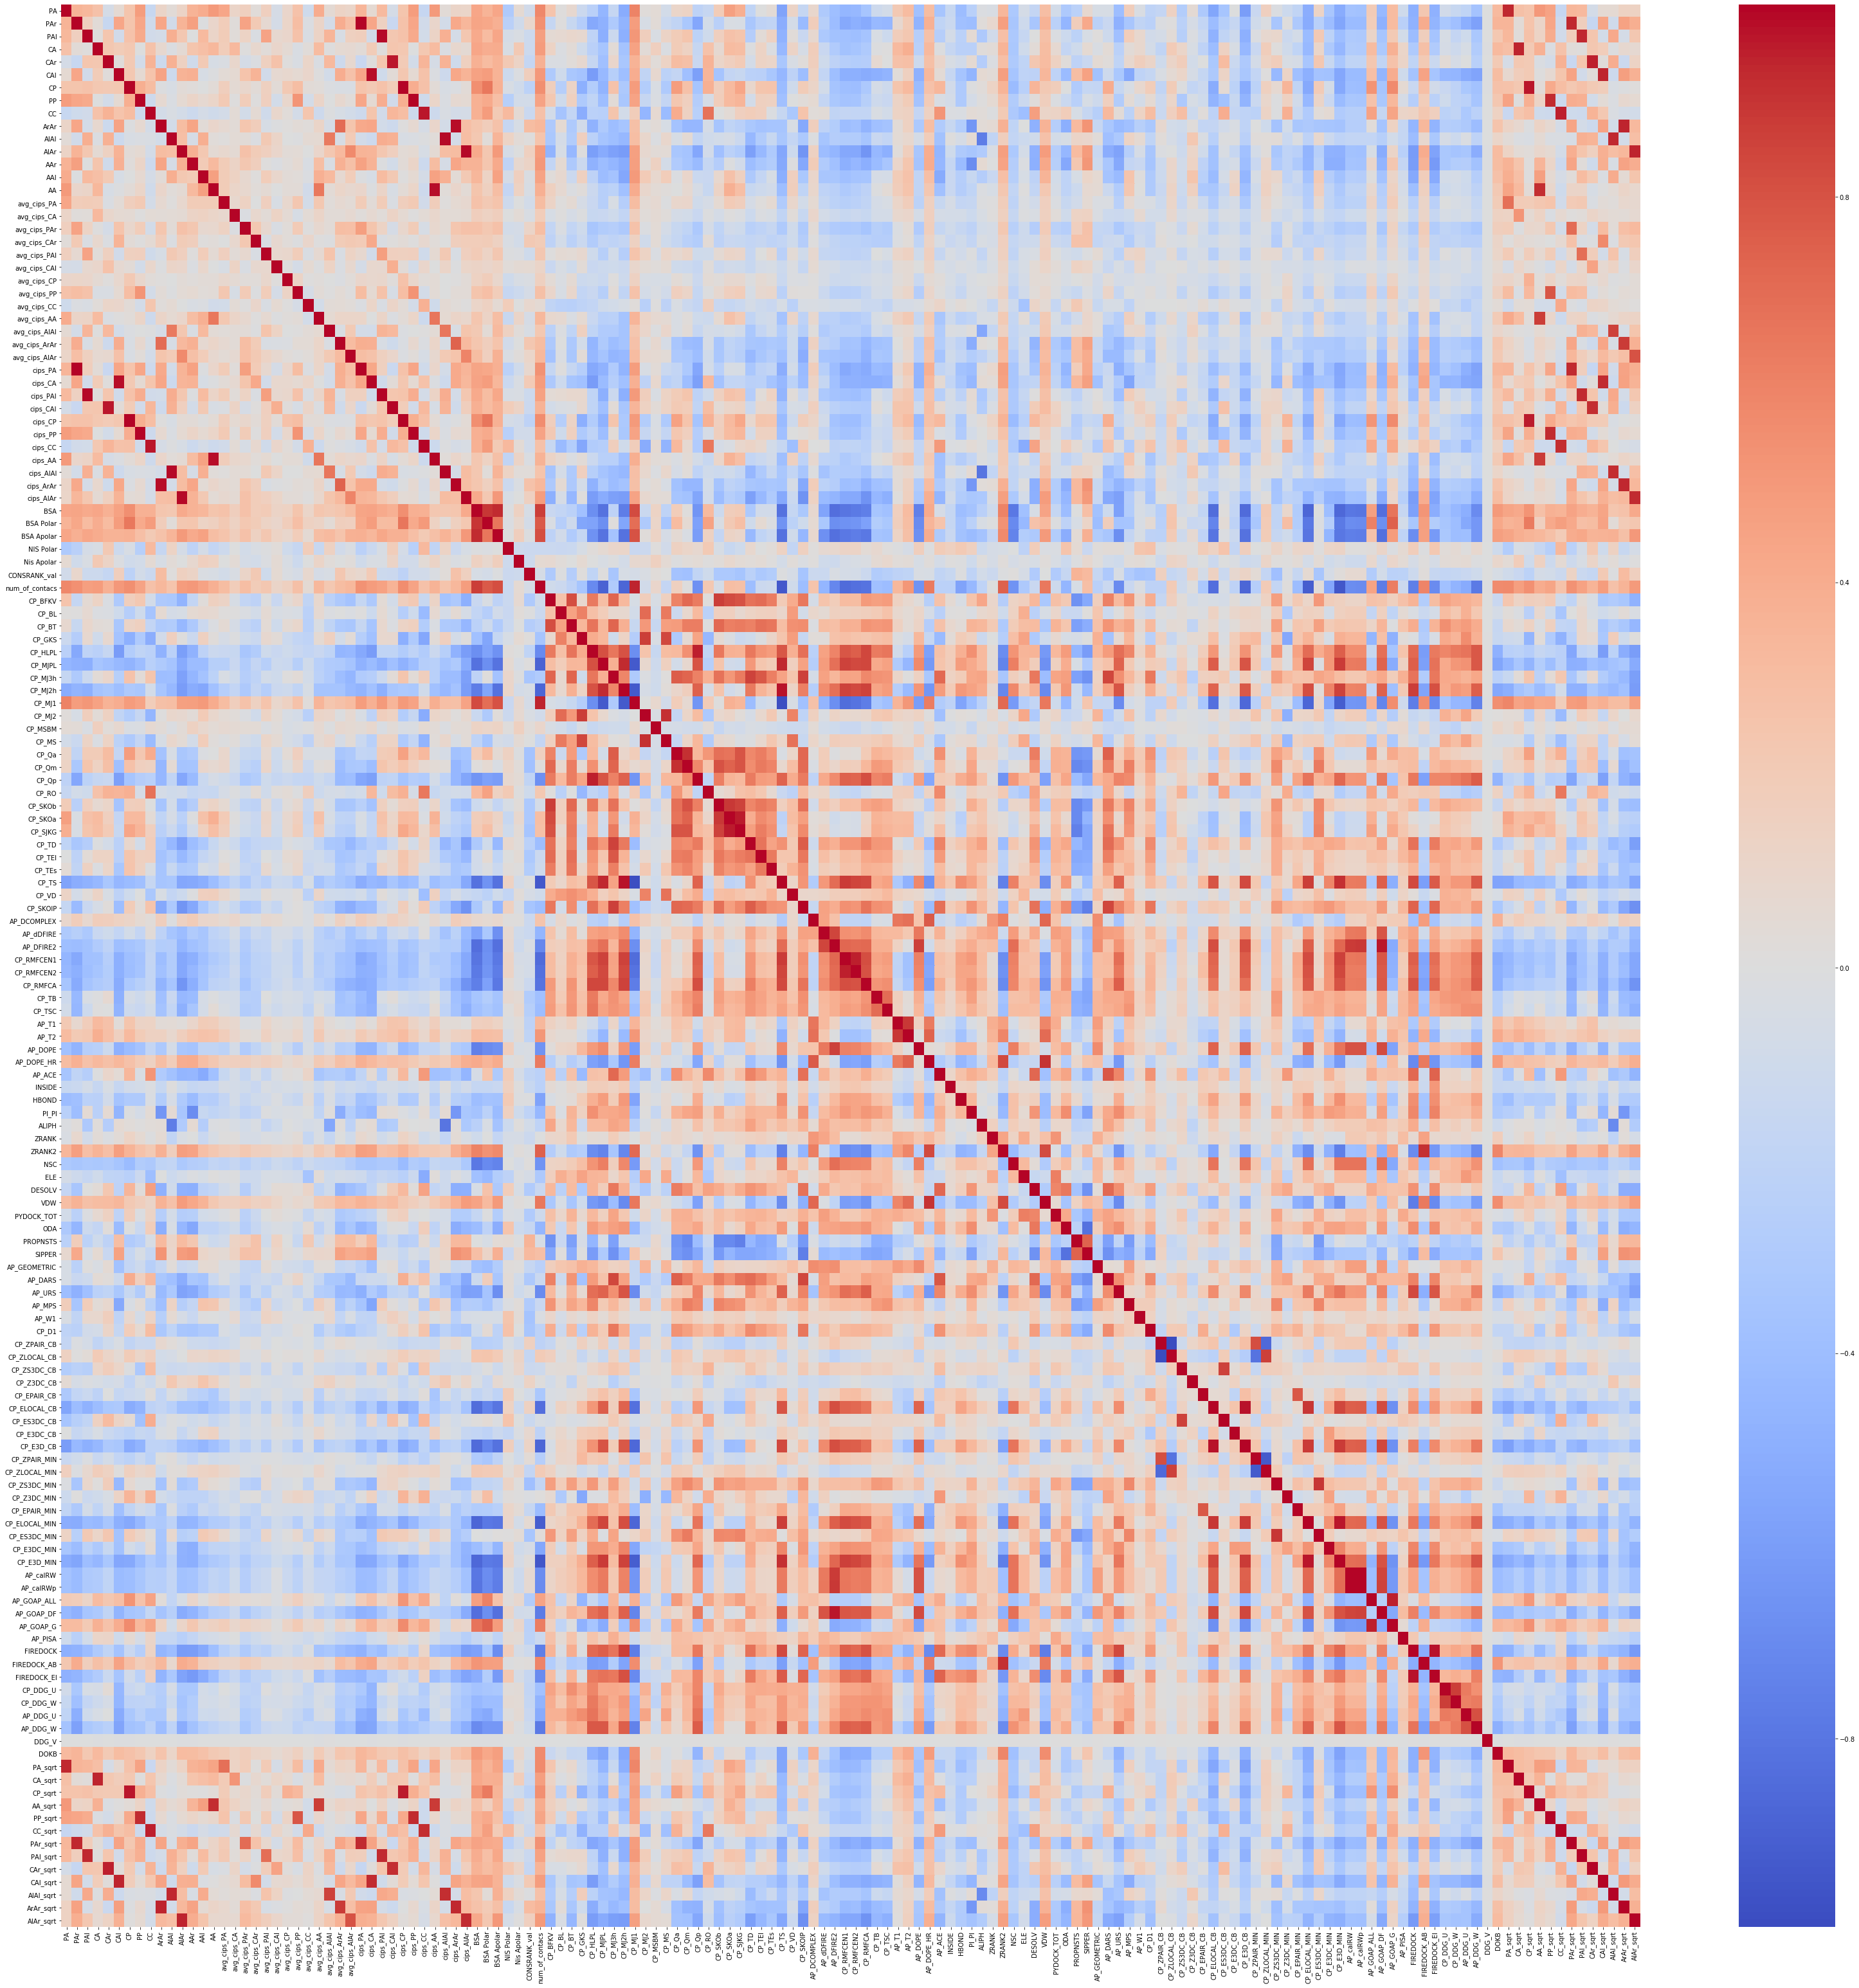

In [6]:
plt.figure(figsize=(55,55))
sns.heatmap( result_complex.drop(["label_binary","CAT_PI","DQ_val"],axis=1).corr(),cmap='coolwarm')

In [7]:
result_complex.columns

Index(['PA', 'PAr', 'PAl', 'CA', 'CAr', 'CAl', 'CP', 'PP', 'CC', 'ArAr',
       ...
       'AA_sqrt', 'PP_sqrt', 'CC_sqrt', 'PAr_sqrt', 'PAl_sqrt', 'CAr_sqrt',
       'CAl_sqrt', 'AlAl_sqrt', 'ArAr_sqrt', 'AlAr_sqrt'],
      dtype='object', length=159)

In [8]:
# os.chdir("RESULTS_CLASSIFICATION_07_19/")
os.chdir("RESULTS_CLASSIFICATION_09_19/")

In [9]:
cwd = os.getcwd()

In [14]:
# my_files = [x for x in os.listdir(cwd) if "08_july_19" in x or "04_agoust_19" in x]
my_files = [x for x in os.listdir(cwd) if "05_september_19.csv" in x]

In [15]:
my_files

['data_frame_feature_importance_RF_ccharppi_05_september_19.csv',
 'data_frame_metrics_ADA_ccharppi_05_september_19.csv',
 'data_frame_metrics_LOGIT_ccharppi_05_september_19.csv',
 'data_frame_metrics_NN_default_ccharppi_05_september_19.csv',
 'data_frame_metrics_RF_ccharppi_05_september_19.csv',
 'data_frame_metrics_RF_selected_features_05_september_19.csv',
 'data_frame_metrics_SVM_ccharppi_05_september_19.csv']

In [17]:
my_dictionary_entries = {}
for m in my_files[1:]:
    df = pd.read_csv(m)
#     print (m,df.shape)
#     print (df["Classifier"].unique()[0])
    Classifier = df["Classifier"].unique()[0]
    accuracy = df["Accuracy"].mean()
    accuracy_std = df["Accuracy"].std()*2
    recall_good = df["Recall good"].mean()
    recall_good_std = df["Recall good"].std()*2
    Precision_good = df["Precision good"].mean()
    Precision_good_std = df["Precision good"].std()*2
    Recall_bad = df["Recall bad"].mean()
    Recall_bad_std = df["Recall bad"].std()*2
    Precision_bad = df["Precision bad"].mean()
    Precision_bad_std = df["Precision bad"].std()*2
    MCC = df["MCC"].mean()
    MCC_std = df["MCC"].std()*2
    my_dictionary_entries[Classifier] = { "Accuracy":accuracy,
                                         "Recall good":recall_good,
                                         "Precision good":Precision_good,
                                         "Recall bad":Recall_bad,
                                         "Precision bad":Precision_bad ,
                                         "MCC":MCC 
                                        }
    

In [18]:
my_results_df = pd.DataFrame.from_dict (my_dictionary_entries)
my_results_df = my_results_df[["Logit","ADABOOST","NN","RF","RFC_FS","SVM"]]

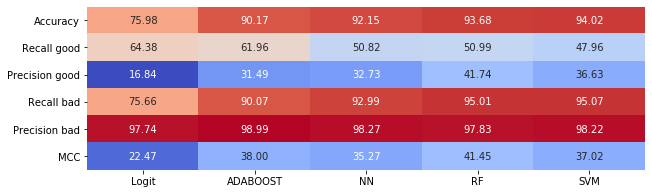

In [19]:
plt.figure(figsize=(10,3))
sns.heatmap( my_results_df.drop("RFC_FS",axis=1)*100,cmap='coolwarm',annot=True,fmt="2.2f", cbar=False)
plt.savefig("Performace_metrics_ccharppi_heatmap_09_19.png",format="png")

In [20]:
my_results_df*100

,Logit,ADABOOST,NN,RF,RFC_FS,SVM
Accuracy,75.981910,90.168007,92.147289,93.677975,93.474804,94.024929
Recall good,64.384507,61.955942,50.822614,50.985158,51.967573,47.962760
Precision good,16.842241,31.489650,32.730219,41.739182,40.454541,36.632724
Recall bad,75.655374,90.071784,92.987310,95.008482,93.841384,95.066292
Precision bad,97.741641,98.989134,98.269503,97.827410,98.739999,98.215237
MCC,22.470301,37.997552,35.272280,41.450343,41.025414,37.017348
